In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# read data
df = pd.read_excel("Cleaned_Insurance_Claims_Data_2.xlsx", sheet_name="Claims Announcements")

In [27]:
df = df.assign(
    ClosingDate = lambda x: pd.to_datetime(x["ClosingDate"]),
    processTime = lambda x: (x['ClosingDate'] - x["AnnouncementDate"]).dt.days
) # Calculate process time
df = df.loc[df["ClosingDate"].dt.year < 2099] # loai dlieu 2099

In [ ]:
product = pd.read_excel("Cleaned_Insurance_Claims_Data_2.xlsx", sheet_name="Products")

In [42]:
df = pd.merge(df, product, how='left', on="ProductID")

In [43]:
df

,ClaimID,ClaimCode,PolicyID,PolicyCode,AnnouncementDate,EventDate,ClosingDate,LastForecastAmount,BrokerID,InsuredID,ProductID,processTime,ProductCategory,ProductSubCategory,Product
0,385398,Clm-385398,807778,Pol-807778,2018-05-22,2018-05-19,2018-08-30,25296.46,394,386585,58,100,Health,Hospital Care,HHC-058
1,340182,Clm-340182,807800,Pol-807800,2017-10-20,2017-10-10,2017-11-20,3700.00,394,19191,58,31,Health,Hospital Care,HHC-058
2,418588,Clm-418588,807800,Pol-807800,2018-11-05,2018-11-02,2019-05-20,257.24,394,19191,58,196,Health,Hospital Care,HHC-058
3,471930,Clm-471930,807800,Pol-807800,2019-06-03,2019-05-29,2020-03-04,11062.23,394,19191,58,275,Health,Hospital Care,HHC-058
4,516031,Clm-516031,807800,Pol-807800,2019-11-27,2019-10-11,2019-12-10,500.00,394,19191,58,13,Health,Hospital Care,HHC-058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10531,533089,Clm-533089,8888576,Pol-8888576,2020-02-20,2020-01-29,2020-03-23,25.00,11119,2524277,58,32,Health,Hospital Care,HHC-058
10532,533088,Clm-533088,8888577,Pol-8888577,2020-02-20,2020-01-28,2020-03-23,25.00,11119,2524278,58,32,Health,Hospital Care,HHC-058
10533,539976,Clm-539976,8915528,Pol-8915528,2020-03-16,2020-02-03,2020-03-17,210.03,11071,2525783,58,1,Health,Hospital Care,HHC-058
10534,526048,Clm-526048,8919887,Pol-8919887,2020-01-10,2019-12-26,2020-04-03,206.52,12333,126848,58,84,Health,Hospital Care,HHC-058


In [4]:
# Đo lường thời gian xử lý yêu cầu và xác định những yếu tố làm chậm quy trình
## Thời gian xử lý trung bình bao lâu? 
## Yêu cầu nào chậm nhất?
## Có thể rút ngắn không?

## Biểu đồ sử dụng: Histogram thời gian xử lý, boxplot theo loại yêu cầu, scatter thời gian vs tiền, timeline quy trình


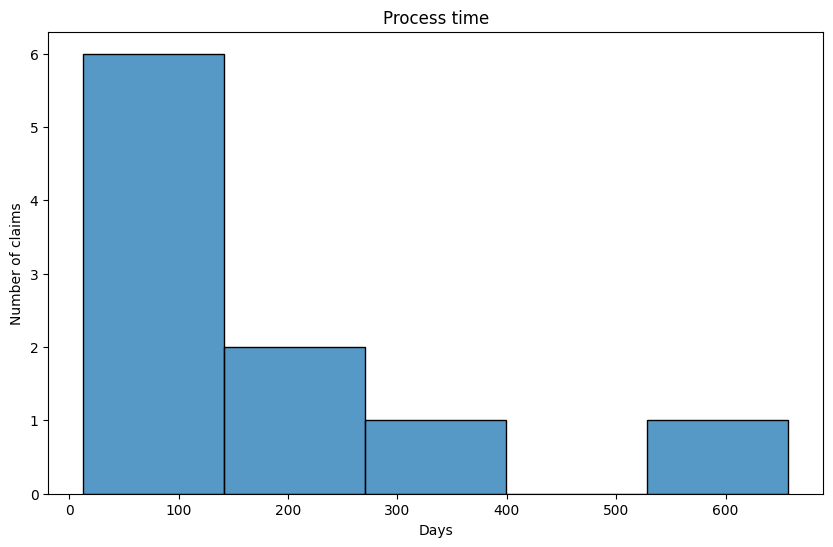

In [48]:
plt.figure(figsize=(10,6)) # Chỉnh kích thước hình
sns.histplot(data=df.head(10), x="processTime")
plt.title("Process time") 
plt.xlabel("Days")
plt.ylabel("Number of claims")
plt.show()

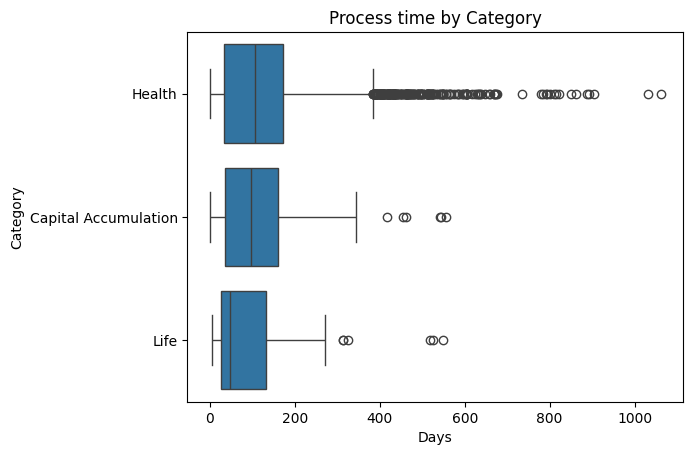

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="processTime", y="ProductCategory")
plt.title("Process time by Category")
plt.xlabel("Days")
plt.ylabel("Category")
plt.show()

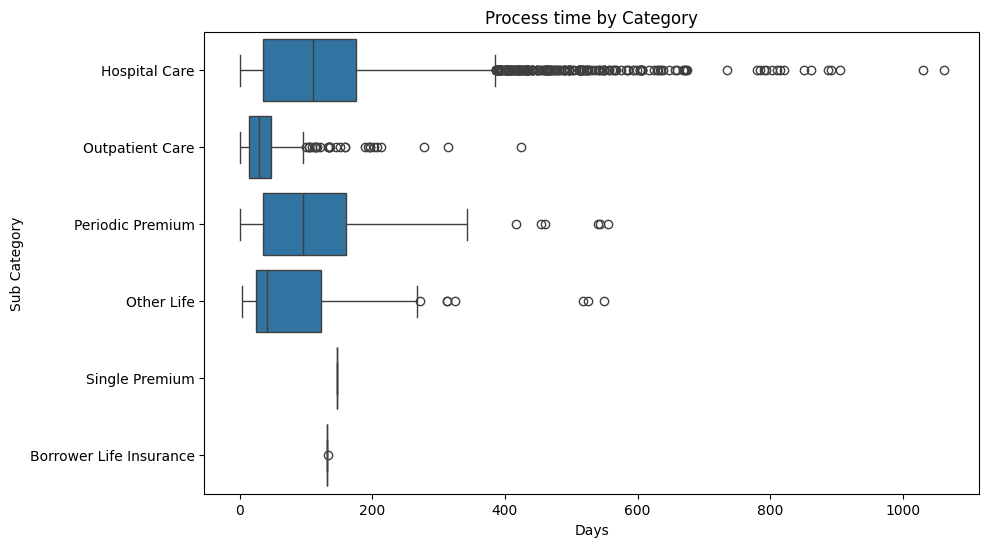

In [52]:
plt.figure(figsize=(10,6)) 
sns.boxplot(data=df, x="processTime", y="ProductSubCategory")
plt.title("Process time by Category")
plt.xlabel("Days")
plt.ylabel("Sub Category")
plt.show()

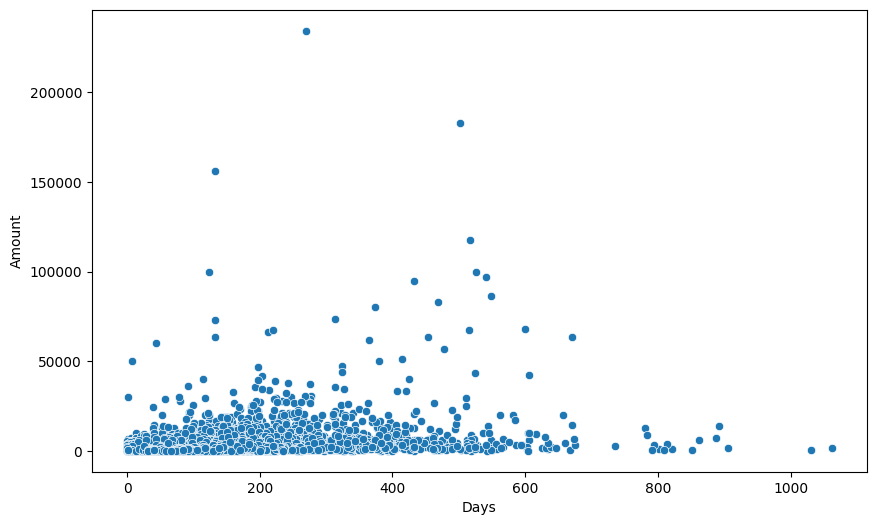

In [53]:
plt.figure(figsize=(10,6)) 
sns.scatterplot(data=df, x="processTime", y="LastForecastAmount")
plt.xlabel("Days")
plt.ylabel("Amount")
plt.show()